# Метод Ньютона и Дихотамии

1. Реализовать **метод Ньютона** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```
    - С учетом кратности корня
2. Реализовать **метод Дихотамии** с конфигурациями:
    - С точностью ```E = 0.1```
    - С точностью ```E = 0.01```


В качестве примера взять функцию ```(x - 1)(x - 2)^2(x - 3)^3 = 0```

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Y')

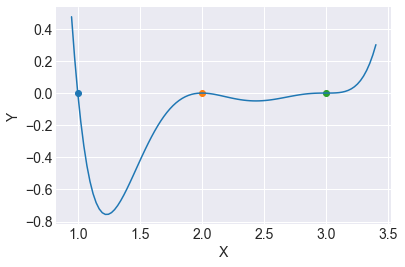

In [35]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

import warnings
warnings.filterwarnings("ignore")


def func(x):
    return (x - 1) * (x - 2)**2 * (x - 3)**3

x = np.linspace(0.95, 3.4, 100)
fig = plt.figure()
plt.plot(x, [func(num) for num in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

In [76]:
def derivative(f, x, dx):
    return (f(x+dx) - f(x-dx))/(2*dx)

## 1. Метод Ньютона (не понимаю, где ошибка)

In [74]:
def nuton_simple(f, x0, EPS=1e-6, xn=None, x=0):
    count = 0
    x = x
    while count < 10000:
        
        xn = x0 - f(x0) / derivative(f, x0, 0.01)
        count += 1
        
        q = (xn - x0) / (x0 - x)
        if abs((xn - x0)/(1 - q)) < EPS:
            print (xn, count)
            
            p = 1 / (1 - q)
            solver = lambda x: f(x) / (abs(x - xn))**p
            nuton_simple(solver, x0, EPS, xn, x)
            return
        
        else:
            x = x0
            x0 = xn
    else:
        return


nuton_simple(func, 4, 0.1)           

3.0558820447848984 9
3.0872623797101544 1
3.1022355521242524 1
3.1593344461324193 1
3.2032589311737674 1
3.2460272377394777 1
3.2882891128074268 1
3.33026320753952 1
3.3720508802376172 1
3.4137076773111197 1
3.4552674210537995 1
3.4967522669797324 1
3.5381775317382753 1
3.579554252636575 1
3.620890649884889 1
3.662193012309373 1
3.7034662597509627 1
3.7447143143238573 1
3.785940353623067 1
3.8271469882851483 1
3.8683363895230602 1
3.909510382663925 1
3.9506705170254057 1
3.991818118974253 1
4.032954332805671 1
4.074080152654018 1
4.115196447698745 1
4.156303982289312 1
4.197403432171527 1
4.238495397688423 1
4.279580414608681 1
4.320658963077137 1
4.3617314750649925 1
4.40279834061226 1
4.443859913089863 1
4.484916513660905 1
4.525968435082882 1
4.56701594496462 1
4.608059288568959 1
4.649098691235531 1
4.690134360483406 1
4.731166487843503 1
4.772195250461134 1
4.813220812502454 1
4.8542433263932585 1
4.895262933913218 1
4.936279767165406 1
4.977293949437879 1
5.018305595971476 1
5.05

26.91169606127347 1
26.95260247551592 1
26.993508874222076 1
27.03441525743696 1
27.075321625222987 1
27.116227977629556 1
27.157134314699668 1
27.198040636501943 1
27.238946943074364 1
27.279853234465087 1
27.320759510738462 1
27.3616657719438 1
27.40257201812826 1
27.443478249339947 1
27.48438446563457 1
27.525290667064027 1
27.566196853667385 1
27.60710302549314 1
27.648009182610423 1
27.688915325049056 1
27.72982145287266 1
27.770727566114555 1
27.811633664833074 1
27.852539749071767 1
27.893445818887887 1
27.93435187431338 1
27.97525791540831 1
28.01616394221495 1
28.057069954773247 1
28.097975953144978 1
28.13888193736624 1
28.17978790748235 1
28.22069386354283 1
28.261599805599207 1
28.302505733684878 1
28.343411647847052 1
28.384317548144764 1
28.425223434610828 1
28.466129307295592 1
28.5070351662413 1
28.54794101148747 1
28.588846843082486 1
28.629752661061726 1
28.670658465474844 1
28.71156425637496 1
28.752470033785364 1
28.79337579777486 1
28.834281548366864 1
28.875187285

44.70498995471642 1
44.74589249275005 1
44.78679502568392 1
44.82769755355307 1
44.86860007633028 1
44.909502594039004 1
44.95040510671244 1
44.991307614326345 1
45.0322101168931 1
45.0731126144527 1
45.11401510699742 1
45.15491759451899 1
45.19582007705918 1
45.23672255461228 1
45.27762502716496 1
45.31852749476733 1
45.35942995742602 1
45.40033241510842 1
45.44123486786214 1
45.482137315684234 1
45.523039758588276 1
45.56394219657479 1
45.60484462966056 1
45.645747057837994 1
45.68664948113729 1
45.72755189960447 1
45.768454313177386 1
45.80935672190015 1
45.85025912577436 1
45.891161524816624 1
45.93206391901466 1
45.97296630840455 1
46.01386869298537 1
46.05477107275482 1
46.09567344773266 1
46.136575817924836 1
46.17747818336583 1
46.218380544039455 1
46.259282899986836 1
46.30018525115202 1
46.341087597604 1
46.38198993932259 1
46.42289227633055 1
46.46379460862302 1
46.504696936193184 1
46.545599259093 1
46.586501577285624 1
46.62740389082243 1
46.66830619969824 1
46.70920850390

62.1291078020221 1
62.17000880840668 1
62.21090981220395 1
62.25181081357093 1
62.29271181236628 1
62.33361280862949 1
62.374513802418356 1
62.415414793642775 1
62.45631578233451 1
62.49721676857107 1
62.53811775230977 1
62.579018733529104 1
62.619919712240446 1
62.66082068841076 1
62.70172166215375 1
62.742622633429754 1
62.783523602191565 1
62.82442456848906 1
62.865325532325656 1
62.90622649362635 1
62.94712745245833 1
62.988028408865105 1
63.028929362789604 1
63.06983031427506 1
63.11073126329768 1
63.151632209853446 1
63.19253315395346 1
63.23343409561955 1
63.27433503483288 1
63.31523597160067 1
63.356136905929496 1
63.39703783782233 1
63.43793876730012 1
63.478839694303346 1
63.51974061893136 1
63.56064154112794 1


RecursionError: maximum recursion depth exceeded

Text(0, 0.5, 'Y')

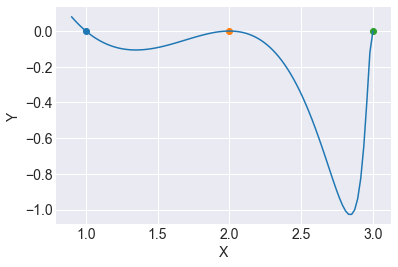

In [75]:
xn = 3.0558820447848984
p = 3.4348940151371035
solver = lambda x: func(x) / (abs(x - xn))**(p)

    
x = np.linspace(0.9, 3., 100)
fig = plt.figure()
plt.plot(x, [solver(val) for val in x])
plt.scatter(1, 0)
plt.scatter(2, 0)
plt.scatter(3, 0)
plt.grid(lw=1)
plt.xlabel('X')
plt.ylabel('Y')

## 2. Метод Дихотамии

In [142]:
res = 0
def dehotam_rec(f, L, R, EPS=0.1):
    x = (L + R) / 2
   
    if abs(L - x) < EPS:
        global res
        res = x
        return 
    
    if f(L)*f(x) < 0:
        dehotam(f, L, x)
    else:
        dehotam(f, x, R)
    

    return 
dehotam_rec(func, -5, 4, 0.01)
print(res)

1.01171875


In [143]:
def dehotam_simple(f, L, R, EPS=0.1):
    while True:
        x = (L + R) / 2
        if abs(L - x) < EPS:
            return x
        
        if f(L)*f(x) < 0:
            R = x
        else:
            L = x


dehotam_simple(func, -5, 4, 0.01)

1.0029296875